In [2]:
#importing n ecessary library
import numpy as np
import pandas as pd


In [3]:
# reading the tes and train data
#Loading the heart_disease_uci dataset
train_data = pd.read_csv('..\data\heart_disease\data_train.csv')
test_data = pd.read_csv('..\data\heart_disease\data_test.csv')
train_data.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,881,62,1.0,3.0,0.0,146.12,170.00,0.0,2.0,120.00,1.0,3.000,0.0,0.0,2.0,1
1,458,54,1.0,1.0,2.0,150.00,216.98,0.0,1.0,122.00,0.0,0.000,2.0,0.0,2.0,0
2,798,51,1.0,3.0,2.0,134.86,339.00,0.0,1.0,132.41,1.0,2.943,1.0,0.0,2.0,1
3,26,50,0.0,0.0,2.0,120.00,219.00,0.0,1.0,158.00,0.0,1.600,1.0,0.0,1.0,0
4,85,52,1.0,0.0,1.0,120.00,325.00,0.0,1.0,172.00,0.0,0.200,2.0,0.0,1.0,0


In [4]:
#checking count of sex
print(train_data['sex'].value_counts())


1.0    586
0.0    150
Name: sex, dtype: int64


In [5]:
# separating the independent and dependent variables in train data treating sex as target
X_train = train_data.drop(columns=['sex'])
y_train = train_data['sex']


In [6]:
# separating the independent and dependent variables in test data
X_test = test_data.drop(columns=['num'])
y_test = test_data['num']


In [7]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the 'sex' feature
smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' balances the minority class
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Combine the resampled 'sex' feature back with the dataset
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Check the new sex distribution
print("Resampled sex distribution:")
print(df_resampled['sex'].value_counts())

Resampled sex distribution:
0.0    586
1.0    586
Name: sex, dtype: int64


In [8]:
# separating num as target 
y_train = df_resampled['num']
X_train = df_resampled.drop(columns=['num'])
print(X_test.head())
X_train.head()


    id  age  sex  dataset   cp  trestbps   chol  fbs  restecg  thalch  exang  \
0  320   36  1.0      1.0  1.0     120.0  166.0  0.0      1.0   180.0    0.0   
1  378   45  1.0      1.0  1.0     140.0  224.0  1.0      1.0   122.0    0.0   
2  539   48  1.0      1.0  0.0     160.0  329.0  0.0      1.0    92.0    1.0   
3  297   59  1.0      0.0  0.0     164.0  176.0  1.0      0.0    90.0    0.0   
4  532   40  0.0      1.0  0.0     150.0  392.0  0.0      1.0   130.0    0.0   

   oldpeak  slope   ca  thal  
0      0.0    2.0  0.0   1.0  
1      0.0    2.0  0.0   1.0  
2      1.5    1.0  2.0   2.0  
3      1.0    1.0  2.0   0.0  
4      2.0    1.0  0.0   0.0  


,id,age,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,sex
0,881,62,3.0,0.0,146.12,170.00,0.0,2.0,120.00,1.0,3.000,0.0,0.0,2.0,1.0
1,458,54,1.0,2.0,150.00,216.98,0.0,1.0,122.00,0.0,0.000,2.0,0.0,2.0,1.0
2,798,51,3.0,2.0,134.86,339.00,0.0,1.0,132.41,1.0,2.943,1.0,0.0,2.0,1.0
3,26,50,0.0,2.0,120.00,219.00,0.0,1.0,158.00,0.0,1.600,1.0,0.0,1.0,0.0
4,85,52,0.0,1.0,120.00,325.00,0.0,1.0,172.00,0.0,0.200,2.0,0.0,1.0,1.0


In [9]:
# changing order of columns in test data such that sex is at end
cols = X_train.columns
X_test = X_test[cols]
X_test.head()

,id,age,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,sex
0,320,36,1.0,1.0,120.0,166.0,0.0,1.0,180.0,0.0,0.0,2.0,0.0,1.0,1.0
1,378,45,1.0,1.0,140.0,224.0,1.0,1.0,122.0,0.0,0.0,2.0,0.0,1.0,1.0
2,539,48,1.0,0.0,160.0,329.0,0.0,1.0,92.0,1.0,1.5,1.0,2.0,2.0,1.0
3,297,59,0.0,0.0,164.0,176.0,1.0,0.0,90.0,0.0,1.0,1.0,2.0,0.0,1.0
4,532,40,1.0,0.0,150.0,392.0,0.0,1.0,130.0,0.0,2.0,1.0,0.0,0.0,0.0


In [10]:
# Training a Random Forest model with depth 20 nestimators 200
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict the target for the test data
y_pred = rf.predict(X_test)

Accuracy of the best model is: 0.9021739130434783
Confusion matrix is: [[68  7]
 [11 98]]


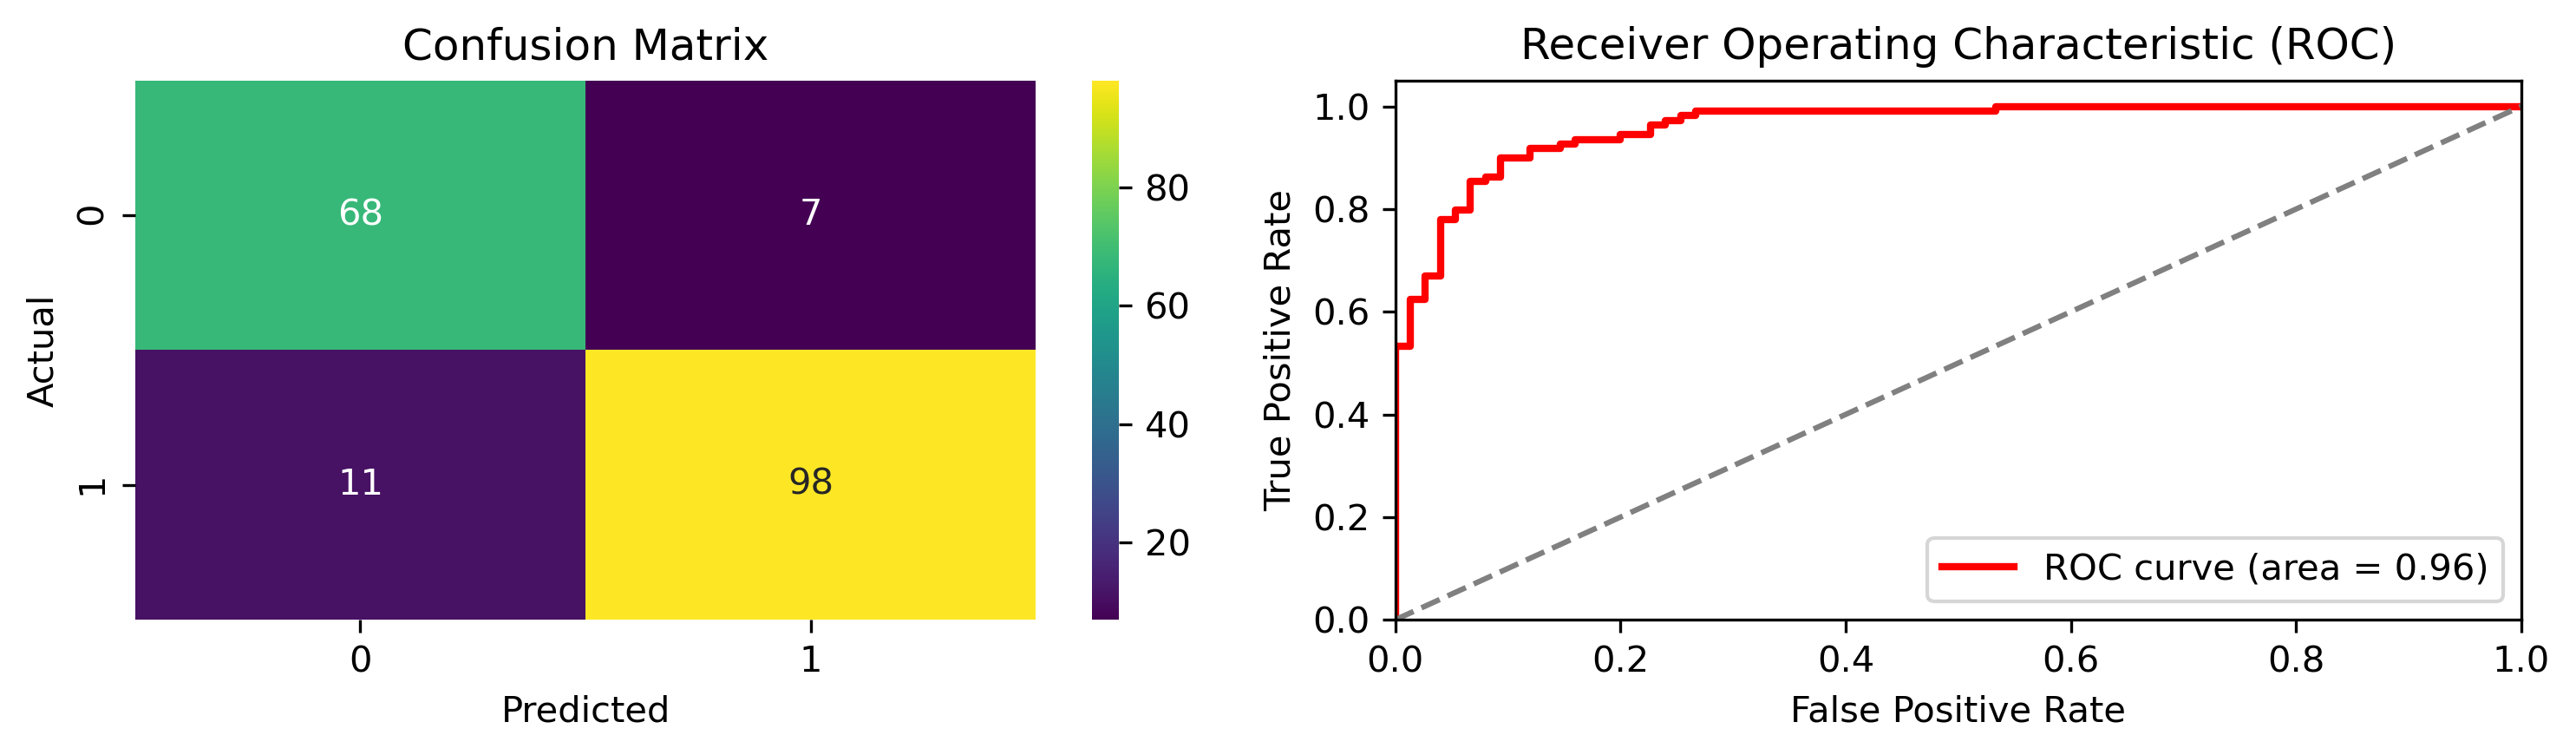

In [11]:
from sklearn.metrics import   roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix


# Checking the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best model is:", accuracy)

# Checking the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix is:", conf_matrix)

# Predict probabilities and compute ROC-AUC
y_prob = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot the ROC Curve and Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(10, 3),dpi=300)

# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# ROC Curve
ax[1].plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()


In [13]:
from transformers import BertTokenizer

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to tokenize each row individually
def tokenize_row(row, tokenizer):
    # Convert the row to string, as BERT expects textual input
    row_str = " ".join(map(str, row.values))
    inputs = tokenizer(row_str, padding='max_length', truncation=True, return_tensors="pt")
    return inputs

# Tokenize the training and testing data
train_inputs = [tokenize_row(row, tokenizer) for _, row in df_resampled.iterrows()]
test_inputs = [tokenize_row(row, tokenizer) for _, row in X_test.iterrows()]


c:\Users\lenovo\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [14]:
import torch
from torch.utils.data import Dataset, DataLoader

class HeartDiseaseDataset(Dataset):
    def __init__(self, inputs, labels):
        self.inputs = inputs
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        input_ids = self.inputs[idx]['input_ids'].squeeze(0)  # Remove batch dimension
        attention_mask = self.inputs[idx]['attention_mask'].squeeze(0)
        label = torch.tensor(self.labels.iloc[idx])
        return input_ids, attention_mask, label

# Create dataset and dataloader
train_dataset = HeartDiseaseDataset(train_inputs, y_train)
test_dataset = HeartDiseaseDataset(test_inputs, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)


In [ ]:
from transformers import BertForSequenceClassification, AdamW

# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Training function
def train(model, train_loader, optimizer):
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    return total_loss / len(train_loader)


# Training loop
num_epochs = 3
for epoch in range(num_epochs):
    avg_loss = train(model, train_loader, optimizer)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}')


In [ ]:
# Get Predictions

# Function to get predictions
def get_predictions(model, data_loader):
    model.eval()
    predictions = []
    with torch.no_grad():
        for batch in data_loader:
            input_ids, attention_mask, _ = batch
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, pred = torch.max(outputs.logits, dim=1)
            predictions.extend(pred.cpu().numpy())
    return predictions

# Get predictions on test set
test_predictions = get_predictions(model, test_loader)




In [ ]:
# create a confusion matrix to evaluate the model
from sklearn.metrics import confusion_matrix
import numpy as np

def evaluate_confusion_matrix(model, test_loader):
    model.eval()
    predictions = []
    actuals = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = batch
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            predictions.extend(torch.argmax(outputs.logits, dim=-1).cpu().numpy())
            actuals.extend(labels.cpu().numpy())
    return confusion_matrix(actuals, predictions)

conf_matrix = evaluate_confusion_matrix(model, test_loader)
print(conf_matrix)